In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Data Collection


In [26]:
master_df= pd.DataFrame()
for file in os.listdir('/content'):
  if file.endswith('.csv'):
    master_df= master_df.append(pd.read_csv(file))
master_df.to_csv('combined_df.csv',index=False)

<ipython-input-26-e72436da8ed8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-26-e72436da8ed8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))
<ipython-input-26-e72436da8ed8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df= master_df.append(pd.read_csv(file))


In [27]:
df=pd.read_csv('combined_df.csv')

In [28]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [29]:
df.shape

(156596, 14)

## Data Cleaning


In [30]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                6886
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating    11872
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             46980
dtype: int64

In [31]:
columns_to_replace = ['education', 'previous_year_rating', 'is_promoted']
df[columns_to_replace]=df[columns_to_replace].fillna(0)

In [32]:
print(df)

        employee_id         department     region         education gender  \
0             65438  Sales & Marketing   region_7  Master's & above      f   
1             65141         Operations  region_22        Bachelor's      m   
2              7513  Sales & Marketing  region_19        Bachelor's      m   
3              2542  Sales & Marketing  region_23        Bachelor's      m   
4             48945         Technology  region_26        Bachelor's      m   
...             ...                ...        ...               ...    ...   
156591        53478              Legal   region_2   Below Secondary      m   
156592        25600         Technology  region_25        Bachelor's      m   
156593        45409                 HR  region_16        Bachelor's      f   
156594         1186        Procurement  region_31        Bachelor's      m   
156595         5973         Technology  region_17  Master's & above      m   

       recruitment_channel  no_of_trainings  age  previous_year

In [33]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [34]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        employee_id         department     region         education gender  \
78298         65438  Sales & Marketing   region_7  Master's & above      f   
78299         65141         Operations  region_22        Bachelor's      m   
78300          7513  Sales & Marketing  region_19        Bachelor's      m   
78301          2542  Sales & Marketing  region_23        Bachelor's      m   
78302         48945         Technology  region_26        Bachelor's      m   
...             ...                ...        ...               ...    ...   
156591        53478              Legal   region_2   Below Secondary      m   
156592        25600         Technology  region_25        Bachelor's      m   
156593        45409                 HR  region_16        Bachelor's      f   
156594         1186        Procurement  region_31        Bachelor's      m   
156595         5973         Technology  region_17  Master's & above      m   

       recruitment_channel  no_of_trainings  ag

## Data Analysis

1. Comparing Gender Ratio
2. Comparing Experience
3. Analysing Ages of Employees
4. Analysing Loyality of Employees toward Company
5. Studying Department Stength

Comparing Gender Ratio

In [35]:
# Calculate the gender ratios
gender_counts = df['gender'].value_counts()
print(gender_counts)


m    110184
f     46412
Name: gender, dtype: int64


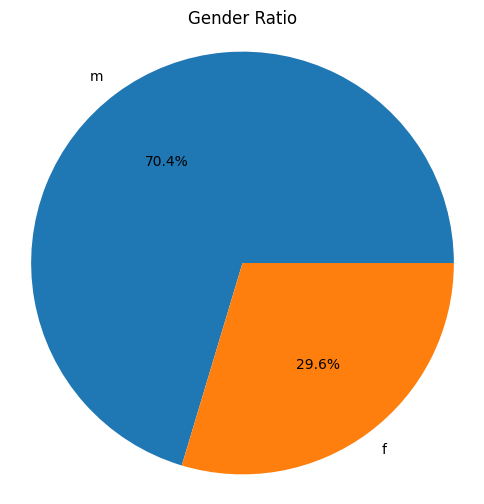

In [36]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.axis('equal')
plt.show()



---



Analysing Length of Service

In [37]:
length_of_service = df['length_of_service']
print(length_of_service)

0          8
1          4
2          7
3         10
4          2
          ..
156591     1
156592     7
156593     4
156594     1
156595     5
Name: length_of_service, Length: 156596, dtype: int64


In [38]:
# Sort the DataFrame by the "length_of_service" column in descending order
data_sorted = df.sort_values(by='length_of_service', ascending=False)

# Display the sorted DataFrame
print(data_sorted)

        employee_id         department     region   education gender  \
31071         51576  Sales & Marketing   region_2  Bachelor's      m   
109369        51576  Sales & Marketing   region_2  Bachelor's      m   
16159         71819  Sales & Marketing   region_2  Bachelor's      f   
66786         71243         Operations   region_2  Bachelor's      m   
11227         71985          Analytics   region_2  Bachelor's      m   
...             ...                ...        ...         ...    ...   
67456         43237  Sales & Marketing  region_22  Bachelor's      f   
112316        56489         Technology   region_6  Bachelor's      f   
112318        63421  Sales & Marketing  region_22  Bachelor's      f   
67445         61191         Technology  region_32  Bachelor's      m   
29422         70641         Operations  region_22  Bachelor's      m   

       recruitment_channel  no_of_trainings  age  previous_year_rating  \
31071             sourcing                2   60             

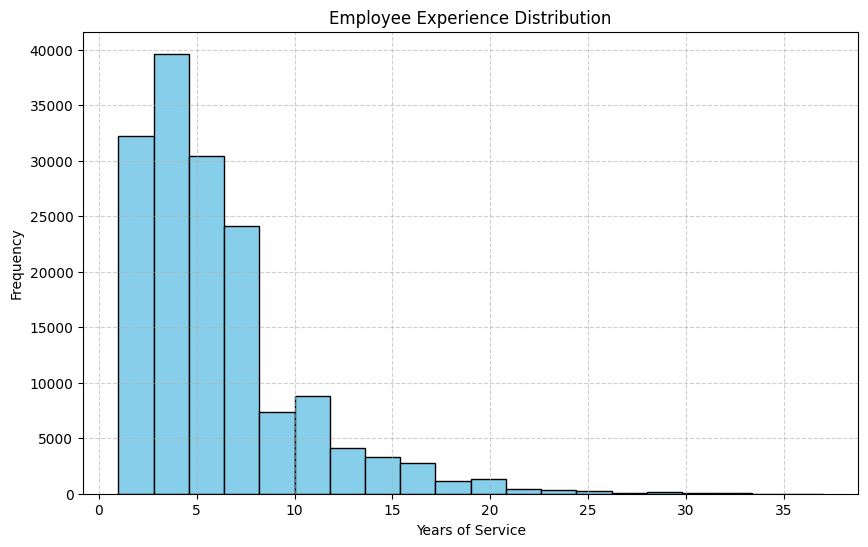

In [39]:
# Create a histogram to compare employee experience
plt.figure(figsize=(10, 6))
plt.hist(length_of_service, bins=20, color='skyblue', edgecolor='black')
plt.title('Employee Experience Distribution')
plt.xlabel('Years of Service')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



---



Visualising Employee Age Variation

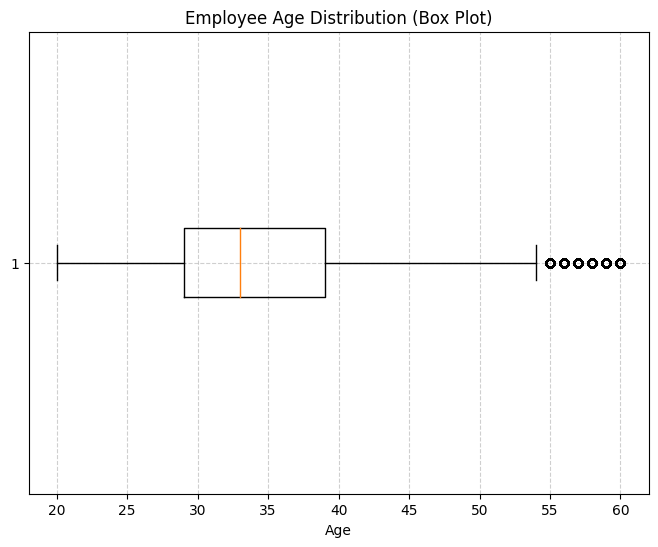

In [41]:
# Extract the 'age' column
ages = df['age']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(ages, vert=False)
plt.title('Employee Age Distribution (Box Plot)')
plt.xlabel('Age')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



---



Analysing Loyality and Retention Rate of Employees

In [43]:
# Calculating loyality of employee by calculating retention rate
retention_rate = (df['is_promoted'].value_counts()[0] / len(df)) * 100

print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 94.04%


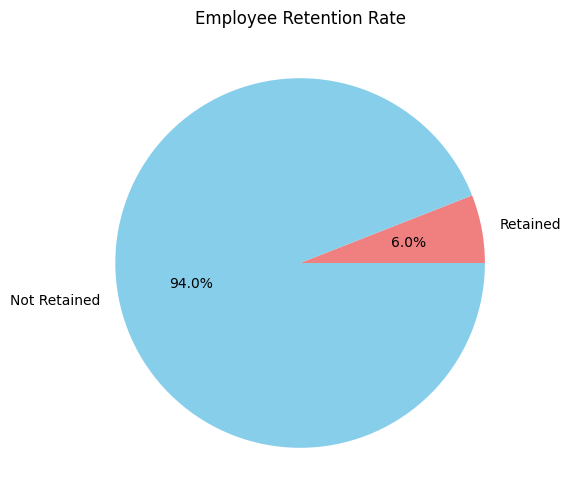

In [49]:
#The retention rate is calculated as the percentage of employees who were not promoted.
#We use a pie chart to visualize the retention rate, with two slices: "Retained" and "Not Retained.
#Retained: Not been promoted
#Not retained: Been Promoted

plt.figure(figsize=(6, 6))
labels = ['Retained', 'Not Retained']
sizes = [100 - retention_rate, retention_rate]
colors = ['lightcoral', 'skyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Employee Retention Rate')
plt.show()



---



Calculating Department Weightage

In [51]:
# Count the number of employees in each department
department_counts = df['department'].value_counts()
print(department_counts)

Sales & Marketing    48310
Operations           32224
Procurement          20316
Technology           20298
Analytics            15342
Finance               7254
HR                    7006
Legal                 2968
R&D                   2878
Name: department, dtype: int64


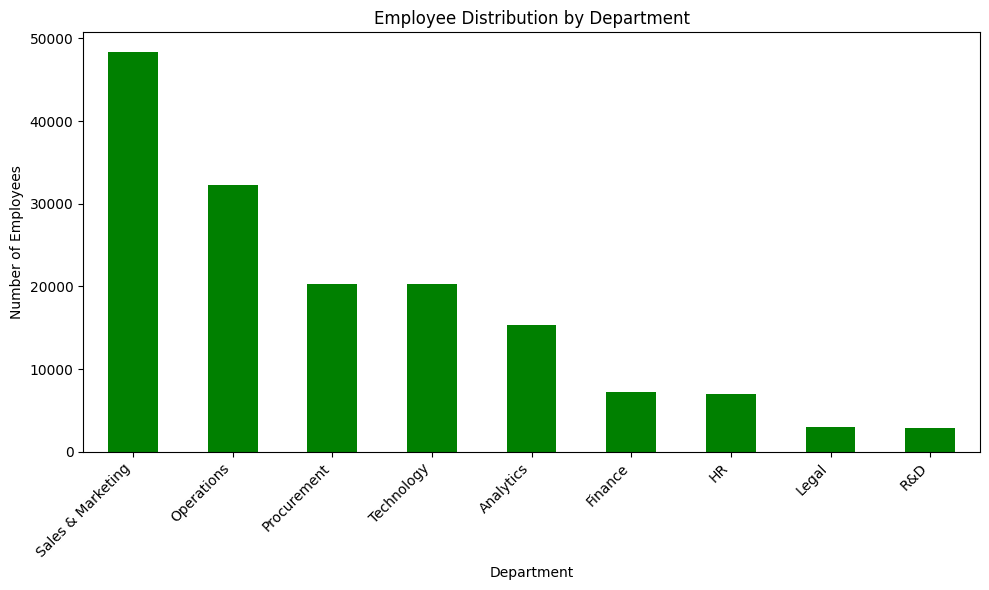

In [54]:
# Create a bar chart for department distribution
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='green')
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---



# THANK YOU!